# Introduction
<br>
* We will guess whether the predictions of cancer. <br>
* We will use various machine learning algorithms in our model. <br>

<div class="text-success "><h3> Table Of Contains</h3></div>

--- 

> ### Steps are:


1. [Gathering Data](#1)
- [Data Filtering](#2)
- [Exploring Data Analysis](#3)
- [Feature Selection Technique](#4)
- [Sampling](#5)
- [Model Building, testing and validation](#6)
- [Logistic Regression](#7)
- [DecisionTreeClassifier](#8)
- [Adaptive Boosting](#9)
- [Voting Classifier](#10)
- [Prediction and Submission](#11)
- [Accuracy, Confusion Matrix and ROC Curve](#12)

In [1]:
#Loading All Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',None)  
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

<a id="1"></a><br>

# 1. Data Collection.

In [2]:
data =  pd.read_csv("C:/Users/adity/Downloads/archive/data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Attribute Information:

1. ID number
- Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.shape

(569, 33)

In [7]:
# Calculation class distribution
target_counts = data.groupby("diagnosis").size()
target_counts

diagnosis
B    357
M    212
dtype: int64


<a id="3"></a><br>

# 2. Data Filtering.

**Now, we have one categorical feature, so we need to convert it into numeric value.**



In [8]:
data.diagnosis.replace({'B':1,'M':0},inplace=True)            

<a id="3"></a><br>
# 3. Exploring Data Analysis

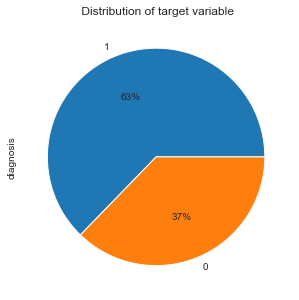

In [56]:
plt.figure(figsize=(5,5))
plt.title(' Distribution of target variable')
data['diagnosis'].value_counts().plot(kind = 'pie',autopct = '%1.0f%%')
plt.savefig('Distributionoftargetvariable.png')
plt.show()

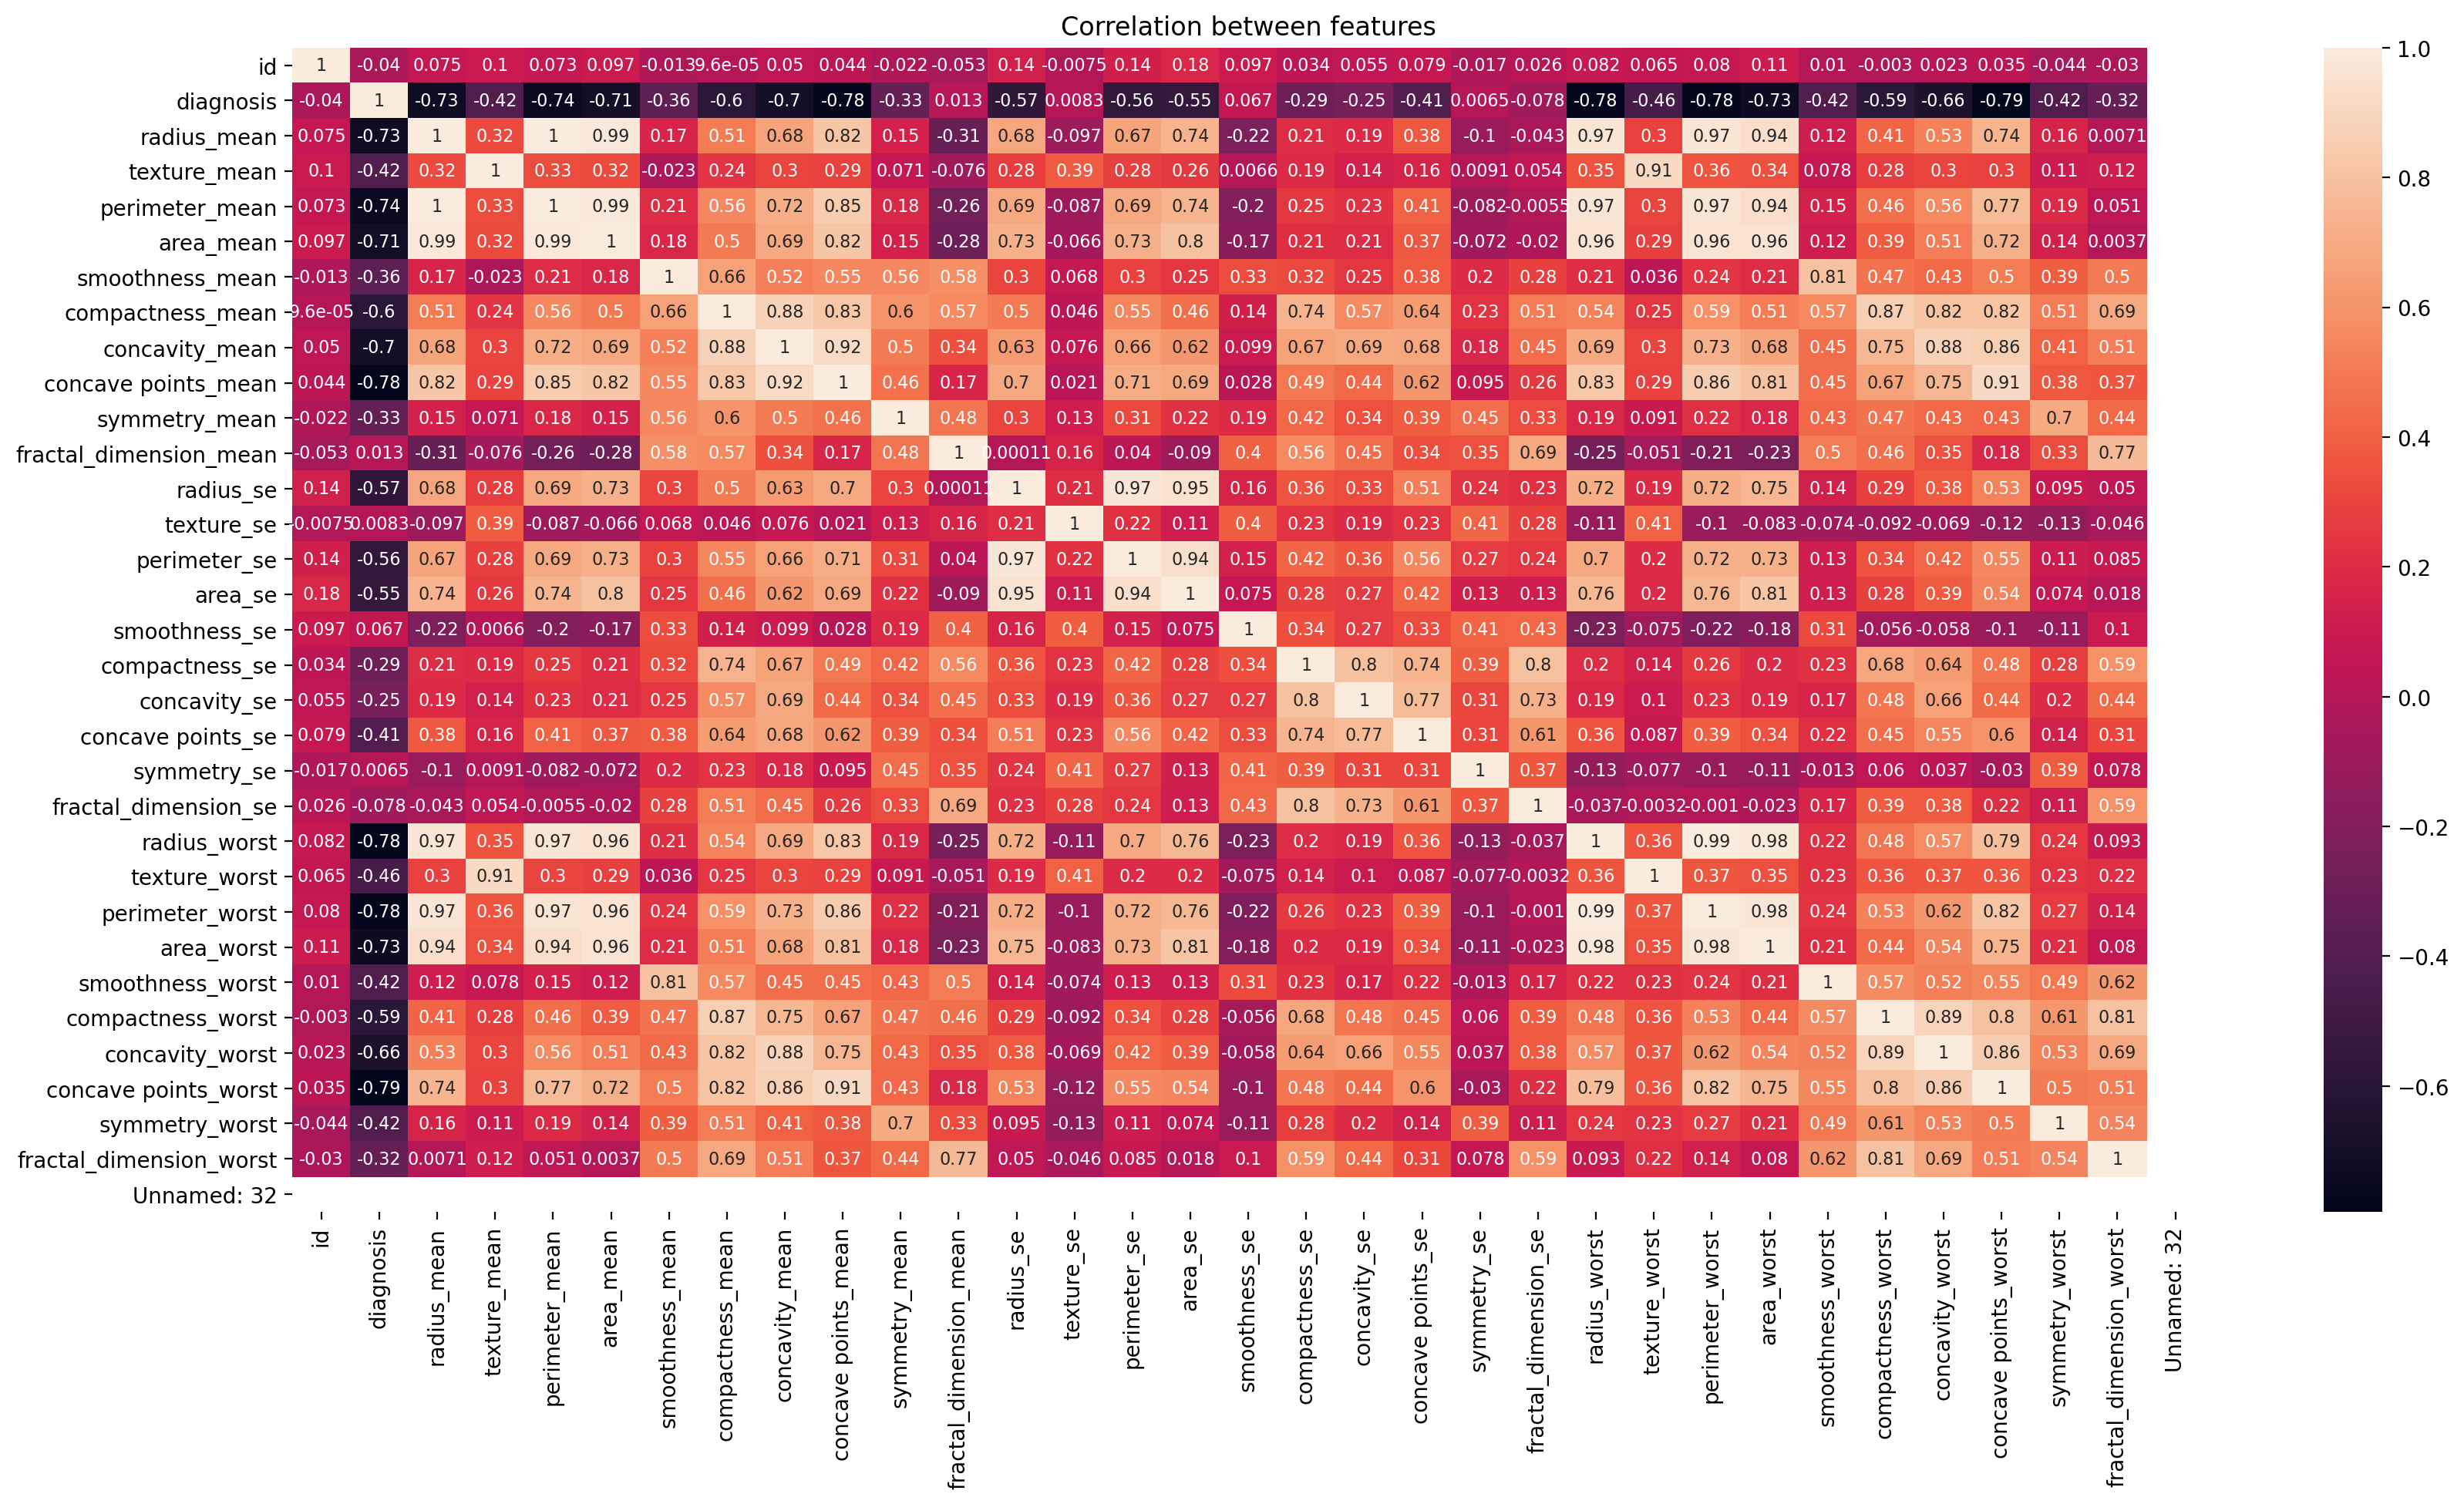

In [10]:
correlation = data.corr()
plt.figure(figsize=(20,10),dpi=200)
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True, annot_kws={"size": 8})
plt.title('Correlation between features')
plt.show()

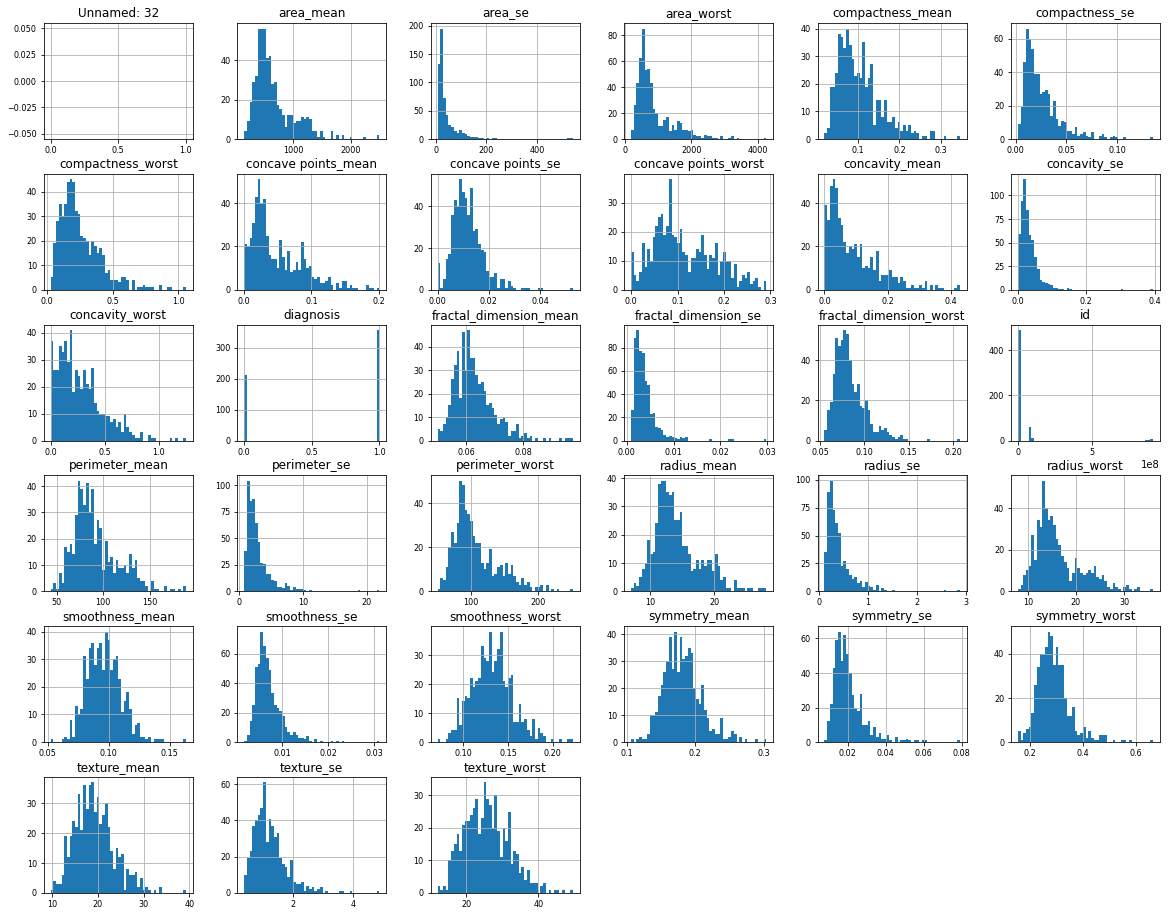

In [11]:
#Skewness checking
data.hist(figsize=(20,16), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [12]:
data.shape

(569, 33)

In [13]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
X = data.loc[:,['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]


In [15]:
y = data.loc[:,'diagnosis']


<a id="4"></a><br>

# 4. Feature Selection Technique.

Recursive Feature Elimination

In [16]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [17]:
rfe = RFE(dtc,12)

In [18]:
rfe.fit(X,y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=12)

In [19]:

pd.DataFrame({'Column_Name':X.columns,'Significant_Level':rfe.support_}).sort_values(['Significant_Level'],ascending=False)

,Column_Name,Significant_Level
17,concave points_se,True
27,concave points_worst,True
26,concavity_worst,True
25,compactness_worst,True
24,smoothness_worst,True
7,concave points_mean,True
23,area_worst,True
22,perimeter_worst,True
21,texture_worst,True
20,radius_worst,True


<a id="5"></a><br>

# 5. Sampling.

    Divide the data into model training dataset and test dataset

In [20]:
import sklearn
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<a id="6"></a><br>

# 6. Model Building, testing and validation.

In [22]:
x = data.loc[:,['concave points_mean','texture_mean','smoothness_mean','area_mean','concavity_mean','radius_mean','perimeter_mean','compactness_mean','symmetry_mean','fractal_dimension_mean']]

y = data.loc[:,'diagnosis']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state=42)

<a id="7"></a><br>

# 7. Logistic Regression.

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
LR = LogisticRegression()

In [26]:
LR = LogisticRegression(max_iter= 150)

In [27]:
LR.fit(X_train,Y_train)

LogisticRegression(max_iter=150)

In [28]:
predictions = LR.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [29]:
tab_log = confusion_matrix(predictions,Y_test)
print(tab_log)

[[ 64   9]
 [  3 112]]


In [30]:
TP_log = tab_log[0, 0]
TN_log = tab_log[1, 1]
FP_log = tab_log[1,0]
FN_log = tab_log[0, 1]

# Accuracy by calculation & built-in fuction
Overall_Accuracy_log = ((TP_log + TN_log) / float(TP_log + TN_log + FP_log + FN_log))
print('Overall Accuracy of Logistic Regression is',Overall_Accuracy_log*100)

print('\n')
# Sensitivity or recall score or tpr
sensitivity_log = TP_log / float(FN_log + TP_log)
print('Sensitivity of Logistic Regression is',sensitivity_log*100)

print('\n')
#Specificity
specificity_log = TN_log / (TN_log + FP_log)
print('Specificity of Logistic Regression is',specificity_log*100)
print('\n')
#Precision
precision_log = TP_log / float(TP_log + FP_log)
print('precision value for Logistic Regression is:',precision_log*100)
print('\n')

#False_Positive_Rate
false_positive_rate_log = FP_log / float(TN_log + FP_log)
print('False Positive Ratio for Logistic Regression is:',false_positive_rate_log*100)

Overall Accuracy of Logistic Regression is 93.61702127659575


Sensitivity of Logistic Regression is 87.67123287671232


Specificity of Logistic Regression is 97.3913043478261


precision value for Logistic Regression is: 95.52238805970148


False Positive Ratio for Logistic Regression is: 2.608695652173913


 
 <a id="8"></a><br>

# 8. DecisionTreeClassifier.

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dte = DecisionTreeClassifier()

In [33]:
dte.fit(X_train,Y_train)

DecisionTreeClassifier()

In [34]:
predictions_dte = dte.predict(X_test)
predictions_dte

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [35]:
tab_dte = confusion_matrix(predictions_dte, Y_test)
tab_dte

array([[ 61,   7],
       [  6, 114]], dtype=int64)

In [36]:
TP_dte = tab_dte[0, 0]
TN_dte = tab_dte[1, 1]
FP_dte = tab_dte[1,0]
FN_dte = tab_dte[0, 1]

# Accuracy by calculation & built-in fuction
accuracy_dte = ((TP_dte + TN_dte) / float(TP_dte + TN_dte + FP_dte + FN_dte))
print('Overall Accuracy of Decision Tree Classifier is :',accuracy_dte*100)

print('\n')
# Sensitivity or recall score or tpr
sensitivity_dte = TP_dte / float(FN_dte + TP_dte)
print('Sensitivity of Decision Tree Classifier is :',sensitivity_dte*100)

print('\n')
#Specificity
specificity_dte = TN_dte / (TN_dte + FP_dte)
print('Specificity of Decision Tree Classifier is :',specificity_dte*100)
print('\n')
#Precision
precision_dte = TP_dte / float(TP_dte + FP_dte)
print('precision value for Decision Tree Classifier is :',precision_dte*100)
print('\n')

#False_Positive_Rate
false_positive_rate_dte = FP_dte / float(TN_dte + FP_dte)
print('False Positive Ratio for Decision Tree Classifier is :',false_positive_rate_dte*100)

Overall Accuracy of Decision Tree Classifier is : 93.08510638297872


Sensitivity of Decision Tree Classifier is : 89.70588235294117


Specificity of Decision Tree Classifier is : 95.0


precision value for Decision Tree Classifier is : 91.04477611940298


False Positive Ratio for Decision Tree Classifier is : 5.0


In [37]:
feature_importance = pd.DataFrame({'Significant_features':dte.feature_importances_,'Columns_name':X_train.columns}).sort_values(['Significant_features'],ascending = False)
feature_importance

,Significant_features,Columns_name
0,0.734570,concave points_mean
6,0.073690,perimeter_mean
4,0.060337,concavity_mean
1,0.054196,texture_mean
3,0.020881,area_mean
2,0.020804,smoothness_mean
7,0.020677,compactness_mean
8,0.007423,symmetry_mean
9,0.007423,fractal_dimension_mean
5,0.000000,radius_mean


 <a id="9"></a><br>

# 9. Adaptive Boosting.

In [38]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

AdaBoost = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=600)

In [39]:
AdaBoost.fit(X_train,Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=600)

In [40]:
predictions_abc = AdaBoost.predict(X_test)
predictions_abc

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [41]:
tab_abc = confusion_matrix(predictions_abc, Y_test)
tab_abc

array([[ 63,  13],
       [  4, 108]], dtype=int64)

In [42]:
accuracy_abp = tab_abc.diagonal().sum() / tab_abc.sum()*100
print('Accuracy for AdaBoost :',accuracy_abp)

Accuracy for AdaBoost : 90.95744680851064


In [43]:
TP_abc = tab_abc[0, 0]
TN_abc = tab_abc[1, 1]
FP_abc = tab_abc[1,0]
FN_abc = tab_abc[0, 1]

# Accuracy by calculation & built-in fuction
Overall_Accuracy_abc= ((TP_abc + TN_abc) / float(TP_abc + TN_abc + FP_abc + FN_abc))
print('Overall Accuracy of Adaptive Boosting is :',Overall_Accuracy_abc*100)
print('\n')
# Sensitivity or recall score or tpr
sensitivity_abc = TP_abc / float(FN_abc + TP_abc)
print('Sensitivity of Adaptive Boosting is :',sensitivity_abc*100)
print('\n')
#Specificity
specificity_abc = TN_abc / (TN_abc + FP_abc)
print('Specificity of Adaptive Boosting is :',specificity_abc*100)
print('\n')
#Precision
precision_abc = TP_abc / float(TP_abc + FP_abc)
print('precision value for Decision Tree Classifier is:',precision_abc*100)
print('\n')

#False_Positive_Rate
false_positive_rate_abc = FP_abc / float(TN_abc + FP_abc)
print('False Positive Ratio for Decision Tree Classifier is:',false_positive_rate_abc*100)

Overall Accuracy of Adaptive Boosting is : 90.95744680851064


Sensitivity of Adaptive Boosting is : 82.89473684210526


Specificity of Adaptive Boosting is : 96.42857142857143


precision value for Decision Tree Classifier is: 94.02985074626866


False Positive Ratio for Decision Tree Classifier is: 3.571428571428571


 <a id="10"></a><br>

# 10. Voting Classifier.

In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
dtreee = DecisionTreeClassifier()
rfcc = RandomForestClassifier()
logstic = LogisticRegression()
Boost = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100)

In [46]:
vc = VotingClassifier(estimators=[ ('dtreee',dtreee),('rfcc',rfcc),('logstic',logstic),('Boost',Boost)],voting='hard')

In [47]:
vc.fit(X_train,Y_train)

VotingClassifier(estimators=[('dtreee', DecisionTreeClassifier()),
                             ('rfcc', RandomForestClassifier()),
                             ('logstic', LogisticRegression()),
                             ('Boost',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                                 n_estimators=100))])

In [48]:
Vooting_Classifier_Accuracy = accuracy_score(vc.predict(X_test),Y_test)
Vooting_Classifier_Accuracy

0.9468085106382979

* Our model estimates 94.68% correctly. Our model works well.

 <a id="11"></a><br>

# 11. Prediction and Submission.

In [49]:
predictions_voting = pd.Series(vc.predict(x), name = "satisfaction").astype(int)
results = pd.concat([data.id, predictions_voting],axis = 1)
results.to_csv("predictions_cancer.csv", index = False)


In [50]:
results.head()

,id,satisfaction
0,842302,0
1,842517,0
2,84300903,0
3,84348301,0
4,84358402,0


 <a id="12"></a><br>

# 12. Accuracy, Confusion Matrix and ROC Curve.

**Comparison Between Models**

In [51]:
accuracies = ({"Logistic Regression":Overall_Accuracy_log*100,
               "Decision Tree Classifier":accuracy_dte*100,
               "Adaptive Boosting":Overall_Accuracy_abc*100})

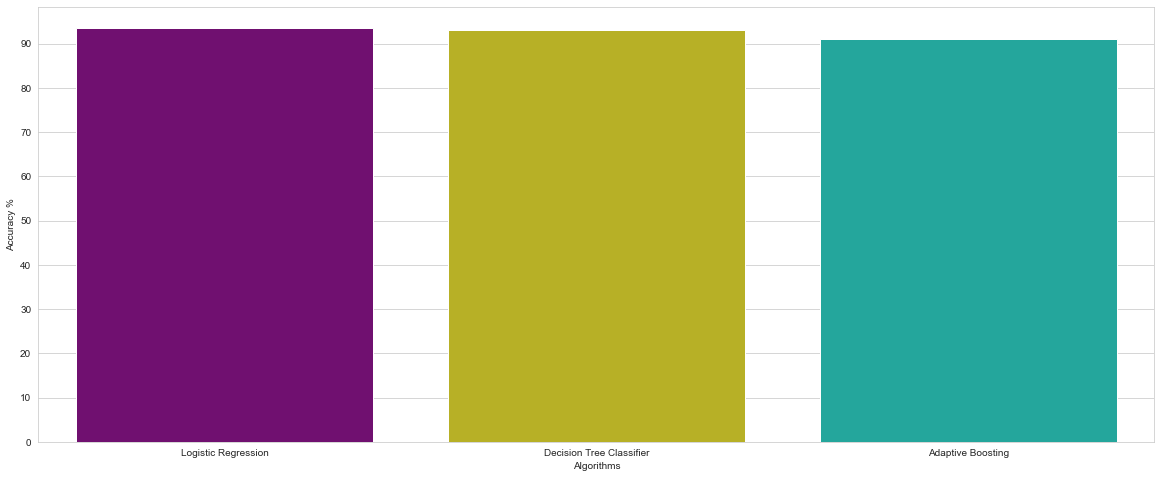

In [52]:
colors = ["purple", "#CFC60E","#0FBBAE"]
sns.set_style("whitegrid")
plt.figure(figsize=(20,8),dpi=None)
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# Confusion Matrixes

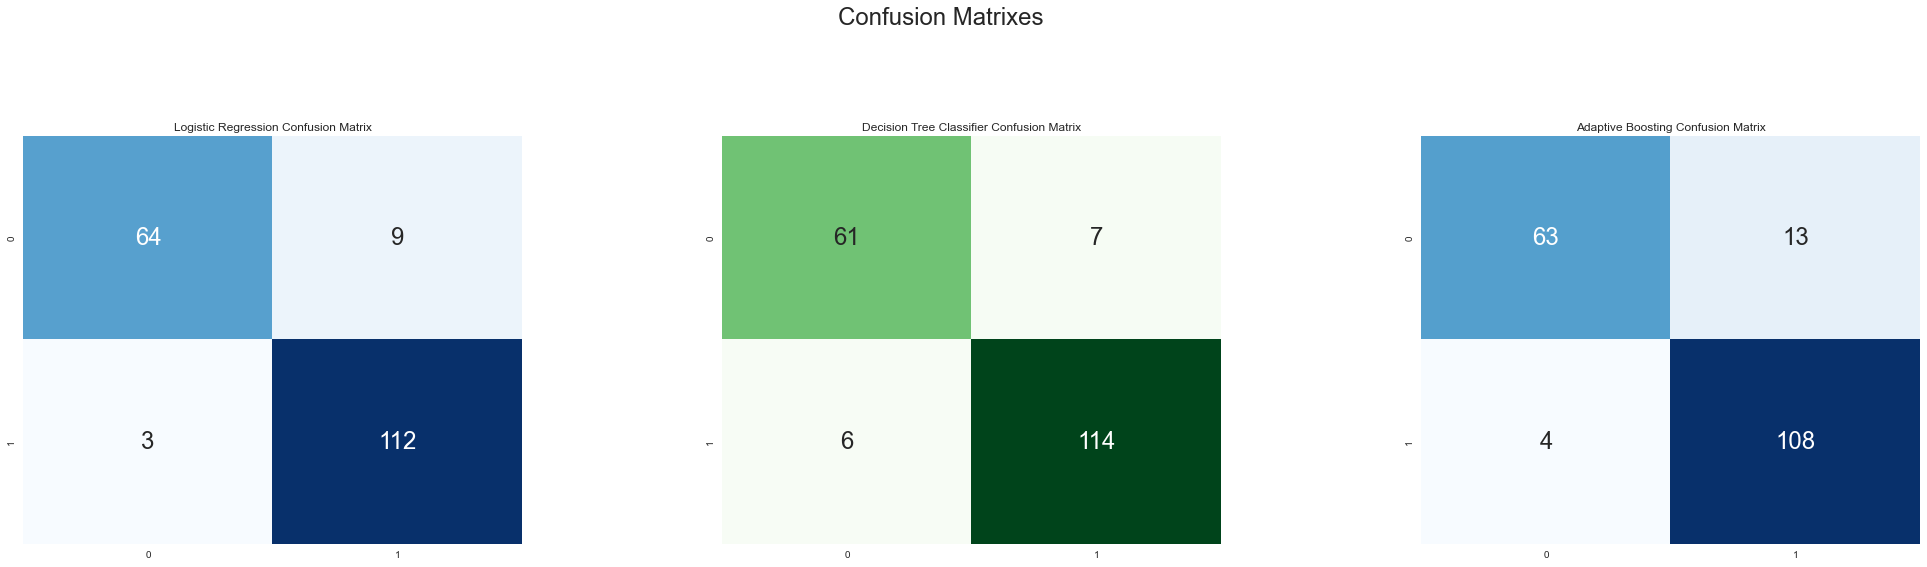

In [54]:
plt.figure(figsize=(34,18),dpi=None)

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(tab_log,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(tab_dte,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Adaptive Boosting Confusion Matrix")
sns.heatmap(tab_abc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()

# ROC Curve

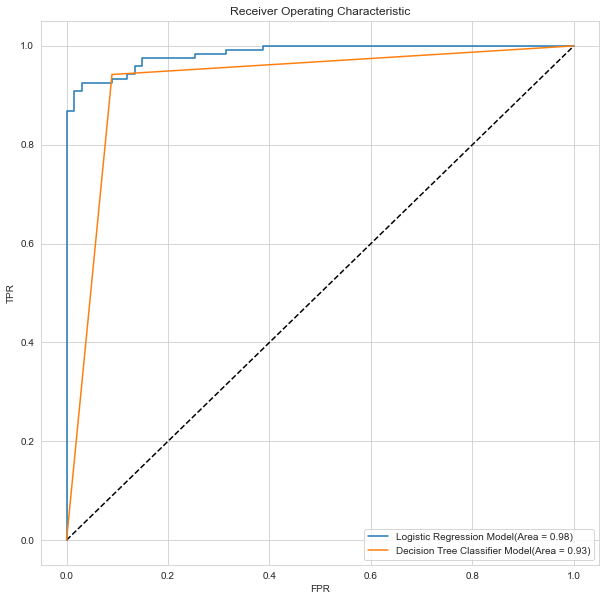

In [55]:

from sklearn.metrics import roc_curve
Y_pred_prob1 = LR.predict_proba(X_test)[:,1]
log_roc_auc_lr = roc_auc_score(Y_test,Y_pred_prob1)
fpr1 , tpr1, thresholds1 = roc_curve(Y_test, Y_pred_prob1)

Y_pred_prob2 = dte.predict_proba(X_test)[:,1]
log_roc_auc_dte = roc_auc_score(Y_test,Y_pred_prob2)
fpr2 , tpr2, thresholds2 = roc_curve(Y_test, Y_pred_prob2)

plt.figure(figsize=(10,10))

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label = 'Logistic Regression Model(Area = %.2f)' % log_roc_auc_lr)
plt.plot(fpr2, tpr2, label = 'Decision Tree Classifier Model(Area = %.2f)' % log_roc_auc_dte)
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title('Receiver Operating Characteristic')
plt.show()


## Conclusion

- We had seen the data clearning and EDA using pandas methods and show some visual graphs to know the behaviour of this dataset and finnaly we train some model for it and calculate the prediction and it's accuracies.